# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

### Reading the CSV file 

In [2]:
titanicDf = pd.read_csv('titanic-passengers.csv', sep = ";")
titanicDf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.65,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,78.542.000.000.000.000,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.075,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0,B71,S


### Some generals usful informations

In [3]:
titanicDf.describe()

,PassengerId,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,714.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594
std,257.353842,0.836071,14.526497,1.102743,0.806057
min,1.000000,1.000000,0.420000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000
50%,446.000000,3.000000,28.000000,0.000000,0.000000
75%,668.500000,3.000000,38.000000,1.000000,0.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000


In [4]:
titanicDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    object 
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(1), int64(4), object(7)
memory usage: 83.7+ KB


# Preprocessing phase

### Finding the missing informations

In [5]:
titanicDf.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Replacing missing values  

#### we will replace the missing values in the 'Age' column with the median :

In [6]:
titanicDf['Age'].fillna(titanicDf['Age'].median(),inplace=True)

#### To replace the missing values in the 'Cabin' column we should know the most repeated values

In [7]:
print(titanicDf['Cabin'].value_counts().head())

G6             4
B96 B98        4
C23 C25 C27    4
C22 C26        3
E101           3
Name: Cabin, dtype: int64


In [8]:
Cabins = np.array(['C23','C25','C27','B96','B98','G6','D','F33'])
S_Cabin = pd.Series(Cabins)

In [9]:
titanicDf['Cabin'].fillna(value=S_Cabin, inplace=True)
titanicDf['Cabin'].fillna(method='ffill', inplace=True)

In [10]:
titanicDf['Embarked'].fillna(method='ffill', inplace=True)

In [11]:
titanicDf['Fare']= pd.to_numeric(titanicDf.Fare.str.replace('[^\d.]', ''), errors='coerce')

In [12]:
titanicDf['Fare'].fillna(titanicDf['Fare'].mean(),inplace=True)

#### Transforming some important categorical data into numerical data

In [13]:
encoder=LabelEncoder()

In [14]:
titanicDf['Embarked']=encoder.fit_transform(titanicDf['Embarked'])

#### Verifying if data is ready to be treated

In [15]:
titanicDf.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

<div class = "alert alert-block alert-success">
    <b>success</b> : Data is ready to be treated
</div>

# Visualization phase

### Studying the distribution of the most important features

#### Histogram of passengers ages

<AxesSubplot:title={'center':'Histogram of ages'}, xlabel='Age', ylabel='Frequency'>

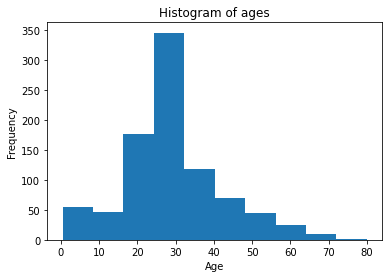

In [16]:
plt.title("Histogram of ages")
plt.xlabel("Age")
titanicDf['Age'].plot.hist()

#### Scatterplot of passengers sex and their age

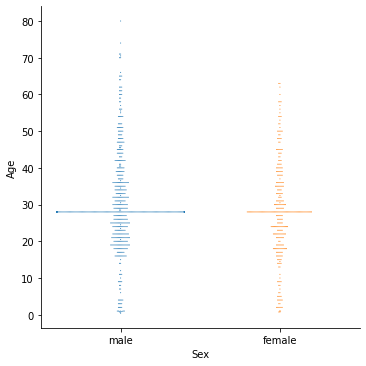

In [17]:
sns.catplot(x="Sex", y="Age",kind="swarm", s=1, data=titanicDf)

#### Barplot showing the average number of survivors

<AxesSubplot:xlabel='Survived', ylabel='count'>

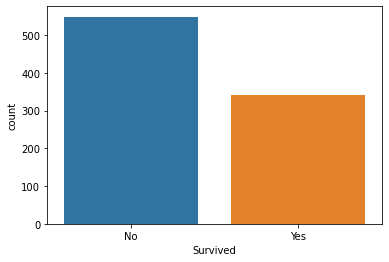

In [18]:
sns.countplot(x='Survived',data=titanicDf)

### Visualization of the correlation between Sex and Age

<AxesSubplot:xlabel='Age', ylabel='Sex'>

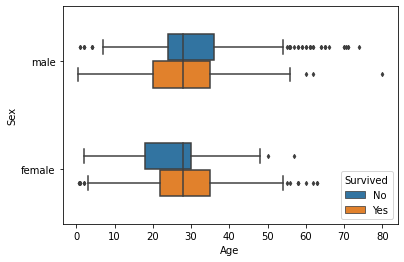

In [19]:
sns.boxplot(x="Age", y="Sex", hue="Survived" , orient="h", data=titanicDf , width=0.5, linewidth=1.5 ,fliersize=3 )

### Visualization of the correlation between Fare and class

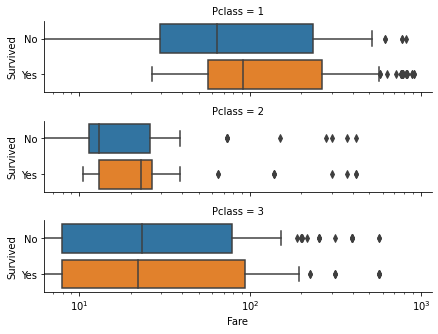

In [20]:
cole = sns.catplot(x="Fare", y="Survived", row="Pclass", kind="box", orient="h", height=1.5, aspect=4, data=titanicDf)
cole.set(xscale="log")

In [21]:
titanicDf['Survived']=encoder.fit_transform(titanicDf['Survived'])

### The correlation between Sex and Class

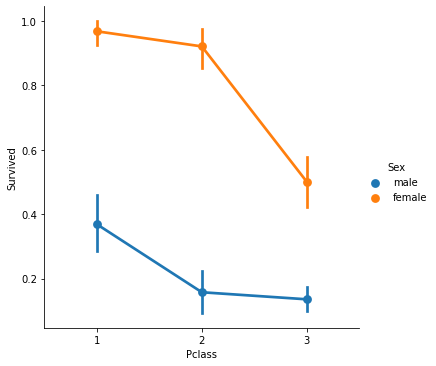

In [22]:
sns.catplot(y="Survived", x="Pclass", hue="Sex", kind="point", data=titanicDf)

In [23]:
def plot_correlation_map( df ):
    corr = df.corr()
    s , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
        )

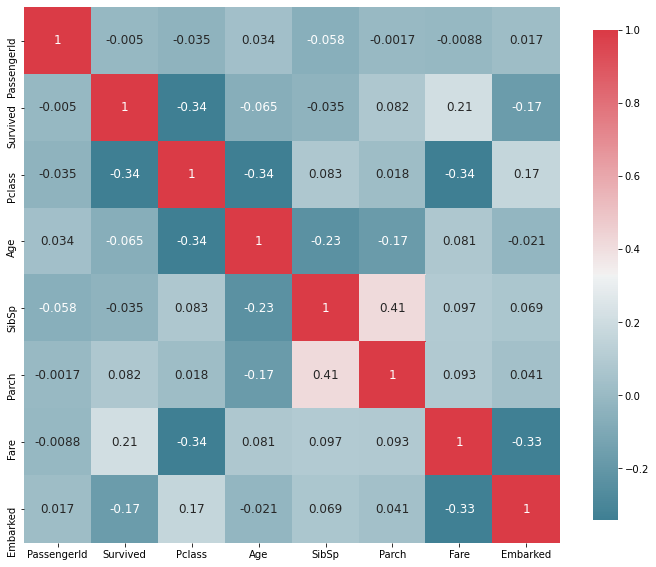

In [24]:
plot_correlation_map(titanicDf)

<div class = "alert alert-block alert-success">
    <b>Note</b> This function tells us how much features are relited by showing a graphical representation of data that uses a system of color-coding to represent different values.
</div>
<div class = "alert alert-block alert-success">
    <b>Note</b> We can notice that there are no very highly correlated columns.
</div>

### Visualising the relation between Pclass and survived 

In [25]:
titanicDf[["Pclass", "Survived"]].groupby(["Pclass"], as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [26]:
titanicDf["Title"]= ""

In [27]:
titanicDf['Title'] = titanicDf.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [28]:
tittanicDf=titanicDf.drop(['Name','Ticket','Cabin','Embarked'], axis = 1 ,inplace=True)

In [29]:
titanicDf.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title
0,343,0,2,male,28.0,0,0,13.000000,Mr
1,76,0,3,male,25.0,0,0,7.650000,Mr
2,641,0,3,male,20.0,0,0,91.498847,Mr
3,568,0,3,female,29.0,0,4,21.075000,Mrs
4,672,0,1,male,31.0,1,0,52.000000,Mr


### The correlation between Title and (Sex,Age,Fare)

<AxesSubplot:>

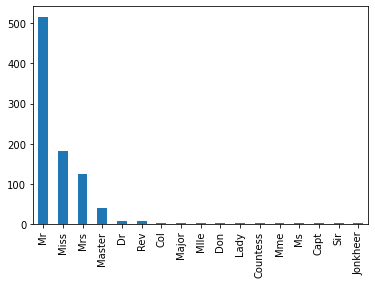

In [30]:
titanicDf.Title.value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Title', ylabel='count'>

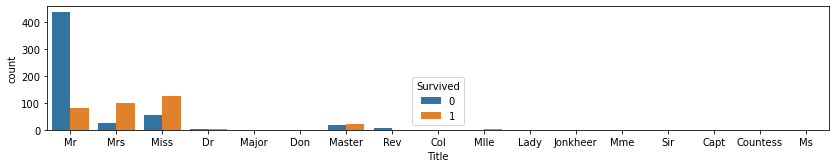

In [31]:
plt.figure(figsize=(14,5))
plt.subplot(2,1,1)
sns.countplot( x='Title' ,hue='Survived',data=titanicDf )

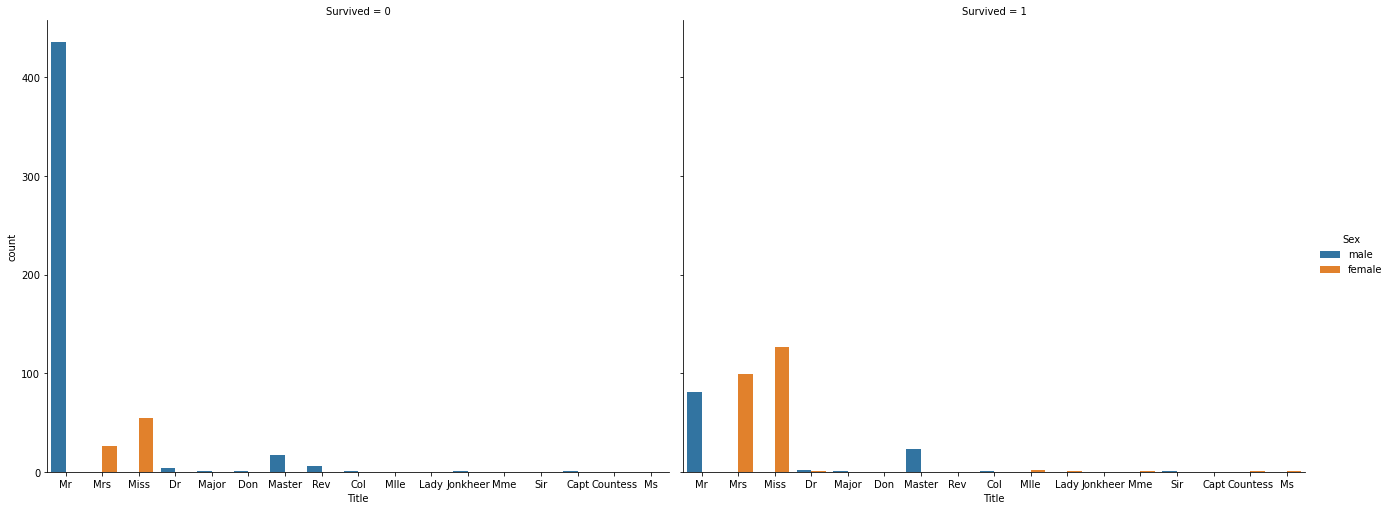

In [32]:
sns.catplot(x="Title", hue="Sex", col="Survived",data=titanicDf, kind="count",height=7, aspect=1.3)

<AxesSubplot:xlabel='Title', ylabel='Age'>

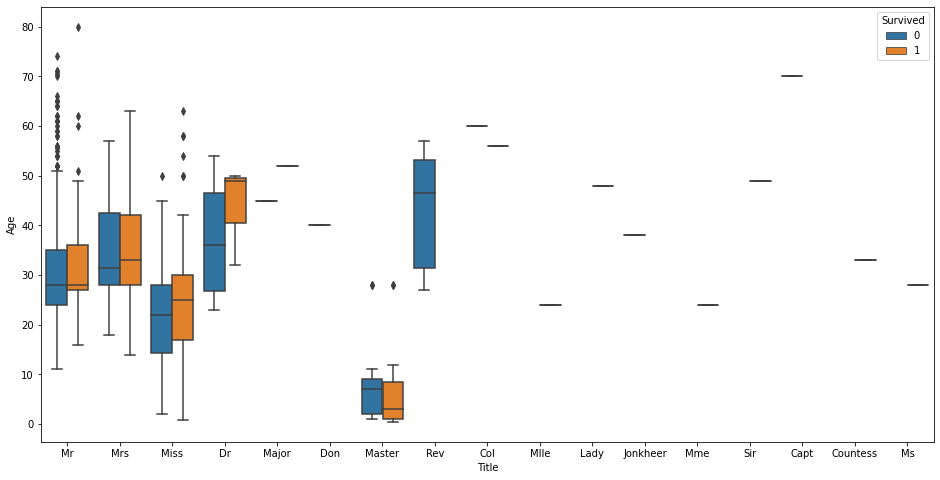

In [33]:
plt.figure(figsize=(16,8))
sns.boxplot(x="Title", y="Age", hue="Survived", data=titanicDf )

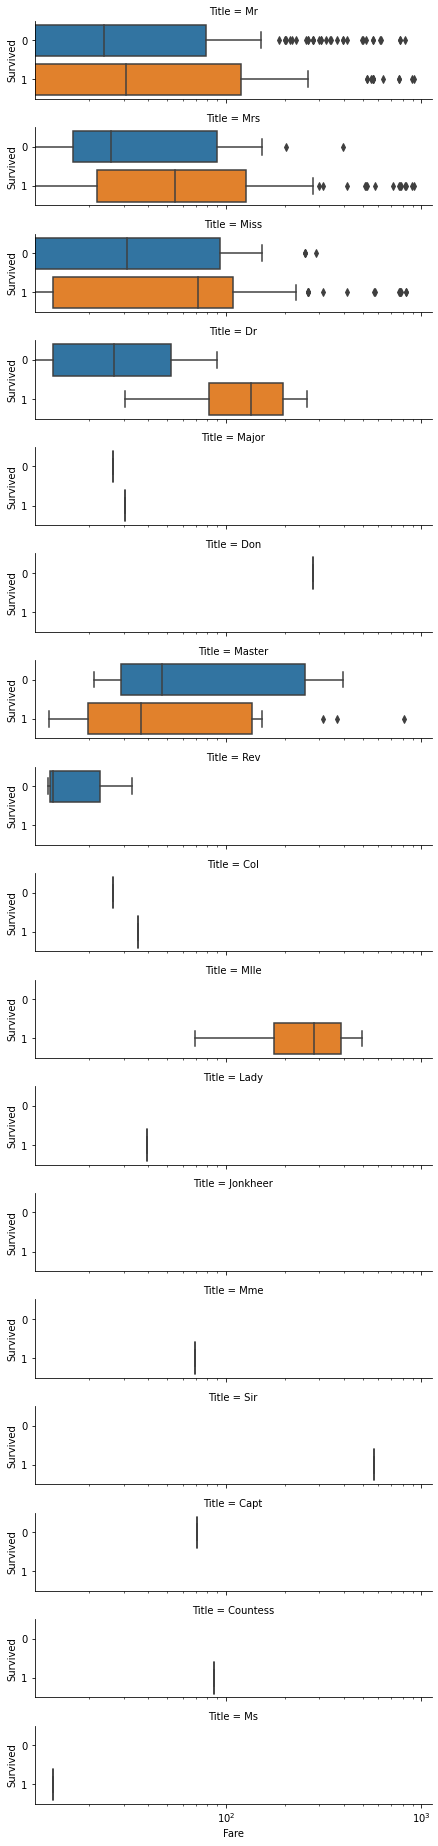

In [34]:
col = sns.catplot(x="Fare", y="Survived", row="Title", kind="box", orient="h", height=1.5, aspect=4, data=titanicDf)
col.set(xscale="log")

### Regrouping some titles 

In [35]:
Title_Dictionary = {
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                      "Dr":         "Officer",
                    "Rev":        "Officer",
                   "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                   "Lady" :      "Royalty",
                  "the Countess": "Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Miss",
                    "Mlle":       "Miss",
                    "Miss" :      "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mrs",
                    "Mrs" :       "Mrs",
                    "Master" :    "Master"}

In [36]:
titanicDf=titanicDf.replace({"Title": Title_Dictionary})

In [37]:
titanicDf.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title
0,343,0,2,male,28.0,0,0,13.000000,Mrs
1,76,0,3,male,25.0,0,0,7.650000,Mrs
2,641,0,3,male,20.0,0,0,91.498847,Mrs
3,568,0,3,female,29.0,0,4,21.075000,Mrs
4,672,0,1,male,31.0,1,0,52.000000,Mrs


#### Visualization of the same previous features

<AxesSubplot:>

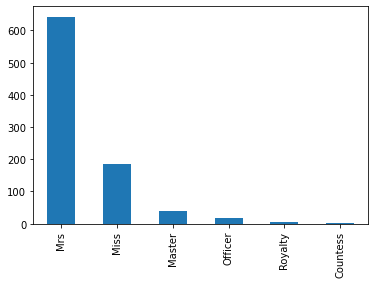

In [38]:
titanicDf.Title.value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Title', ylabel='count'>

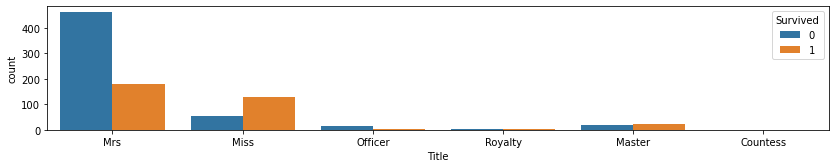

In [39]:
plt.figure(figsize=(14,5))
plt.subplot(2,1,1)
sns.countplot( x='Title' ,hue='Survived',data=titanicDf )

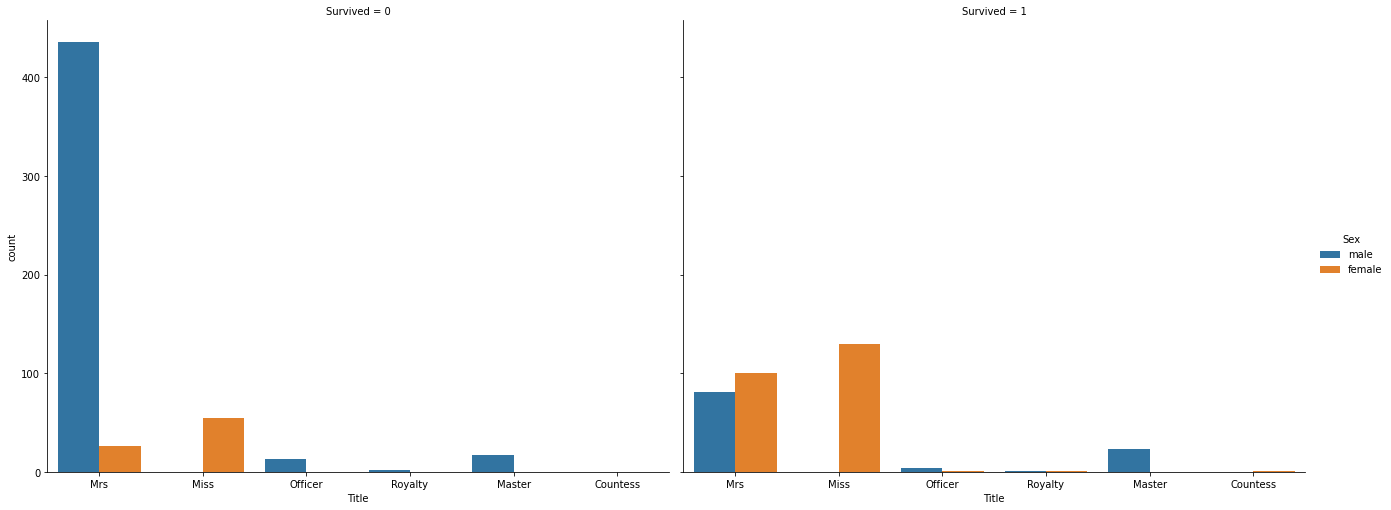

In [40]:
sns.catplot(x="Title", hue="Sex", col="Survived",data=titanicDf, kind="count",height=7, aspect=1.3)

<AxesSubplot:xlabel='Title', ylabel='Age'>

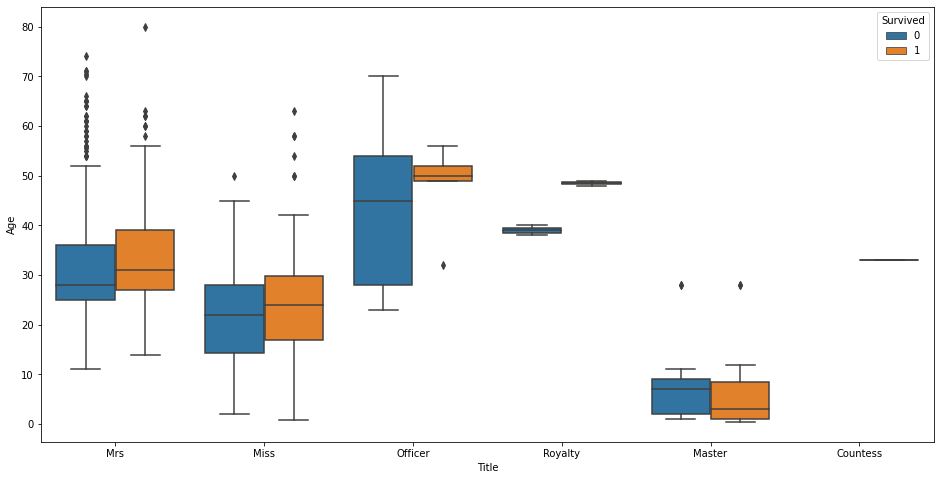

In [41]:
plt.figure(figsize=(16,8))
sns.boxplot(x="Title", y="Age", hue="Survived", data=titanicDf )

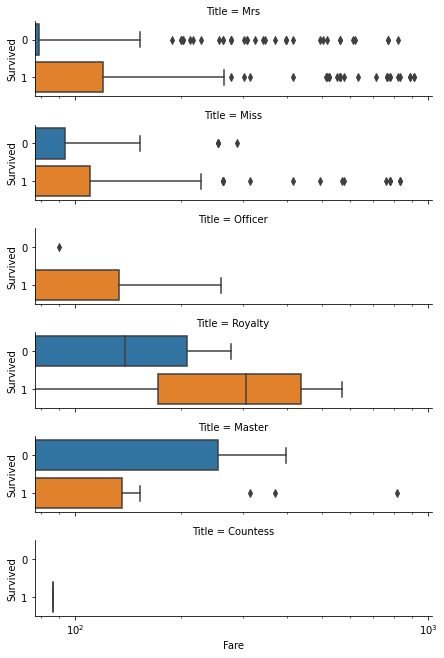

In [42]:
col = sns.catplot(x="Fare", y="Survived", row="Title", kind="box", orient="h", height=1.5, aspect=4, data=titanicDf)
col.set(xscale="log")

In [43]:
titanicDf['FamilySize'] = titanicDf['SibSp'] + titanicDf['Parch'] + 1

In [44]:
titanicDf.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title,FamilySize
0,343,0,2,male,28.0,0,0,13.000000,Mrs,1
1,76,0,3,male,25.0,0,0,7.650000,Mrs,1
2,641,0,3,male,20.0,0,0,91.498847,Mrs,1
3,568,0,3,female,29.0,0,4,21.075000,Mrs,5
4,672,0,1,male,31.0,1,0,52.000000,Mrs,2


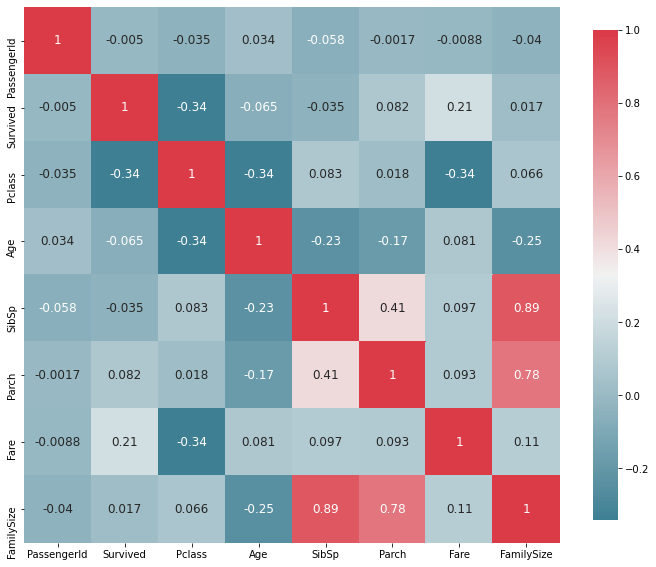

In [45]:
plot_correlation_map(titanicDf)

<div class = "alert alert-block alert-success">
    <b>Note</b> After Visualising most features and correlation map we can conclude that this featur "FamilySize" is not very useful, most of its correlation coefficients are low.
</div>